In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
!sudo apt install build-essential libpoppler-cpp-dev pkg-config python3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libpoppler-cpp0v5
The following NEW packages will be installed:
  libpoppler-cpp-dev libpoppler-cpp0v5
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 36.7 kB of archives.
After this operation, 188 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-cpp0v5 amd64 0.62.0-2ubuntu2.12 [28.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler

In [ ]:
!pip install pdftotext

     |████████████████████████████████| 113 kB 5.2 MB/s 
  Created wheel for pdftotext: filename=pdftotext-2.2.2-cp37-cp37m-linux_x86_64.whl size=54922 sha256=d28cd6af643331219fe15f44045a6884643d00cd6815e6409afdff1c3b0c23df
  Stored in directory: /root/.cache/pip/wheels/98/19/8e/e8648026db8b7ef3324ad9afa1f7c9109a7e7509846f693ed9
Successfully built pdftotext


In [ ]:
import pdftotext

#**Implementação BI**

In [ ]:
from google.colab import files
uploaded=files.upload()





Saving 0500005-95.2017.4.05.8405.pdf to 0500005-95.2017.4.05.8405 (3).pdf


In [ ]:
print(len(pdf))

In [ ]:
# Read some individual pages
page1 = pdf[0]
print(pdf[0])


In [ ]:
import re

In [ ]:
numero = re.search("Número:.{0,}", page1)
justica_gratuita = re.search("Justiça gratuita?.{0,}", page1)
valor_causa = re.search("Valor da causa:.{0,}", page1)

In [ ]:
print(numero.group(0))
print(justica_gratuita.group(0))
print(valor_causa.group(0))

In [ ]:
type(justica_gratuita.group(0))
justica_gratuita_modificada = justica_gratuita.group(0).replace('?', ':')

print(justica_gratuita_modificada)

#**Conexão com o Redis**

In [ ]:
!pip install redis-server redis

     |████████████████████████████████| 5.5 MB 4.4 MB/s 
     |████████████████████████████████| 241 kB 61.8 MB/s 


In [ ]:
import redis_server
!$redis_server.REDIS_SERVER_PATH --daemonize yes

In [ ]:
import redis
client = redis.Redis(host = 'localhost', port=6379)

In [ ]:
client.keys()

[]

#**Abrindo PDF**


In [24]:
# Abrir petição
from google.colab import files
import io
upload = files.upload()
filename = list(upload.keys())[0]
print(filename)

#Criando objeto pdf
pdf = pdftotext.PDF(io.BytesIO(upload[filename]))

Saving Petição inicial audiência.pdf to Petição inicial audiência.pdf
Petição inicial audiência.pdf


#**Salvar PDF no Redis**

In [25]:
# Obtendo numero do processo para usar como chave no redis
import re
regex_num = r'(\d{7}-\d{2}\.\d{4}\.\d\.\d{2}\.\d{4})'
page1 = pdf[0]
numero = re.search(regex_num, page1)
if numero:
    #Transformando a informação do pdf em string
    pdf_to_str = "\n\n".join(pdf)
    #Salvando info no Redis, usando o num do processo como chave
    client.set(numero[0], pdf_to_str)
    print(numero[0])
else:
    print("Numero do processo não encontrado")

0003026-87.2022.4.05.8300


In [26]:
#Recuperar keys salvas no redis
print(client.keys())

[b'0031569-55.2018.8.17.2001', b'0000283-20.2021.4.05.8307', b'0000194-94.2021.4.05.8307', b'0000534-98.2022.4.05.8308', b'0003026-87.2022.4.05.8300']


#**WordCloud**

In [27]:
#Instalar o wordcloud
!pip install wordcloud -q

In [28]:
#importar pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
import pdftotext

#stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
#Instanciando stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')

In [30]:
# Adicionar mais palavras ao stopwords criado, verificando se já existe
new_stopwords = ['art', 'trf5', 'pje', 'jfpe', 'pje1', 'https', 'jus', 'br', 
                 'pág', 'listView','seam', 'pje1g', 'eletronicamente']
print(len(stopwords))
for word in new_stopwords:
  if word not in stopwords:
    stopwords.append(word)
print(len(stopwords))

204
217


In [31]:
# concatenar os textos extraidos das petições
result = ''
for key in client.keys():
  pet = client.get(key)
  if pet:
    print(key)
    result += pet.decode('utf-8')

b'0031569-55.2018.8.17.2001'
b'0000283-20.2021.4.05.8307'
b'0000194-94.2021.4.05.8307'
b'0000534-98.2022.4.05.8308'
b'0003026-87.2022.4.05.8300'


In [32]:
# Gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=1600, height=800).generate(result)

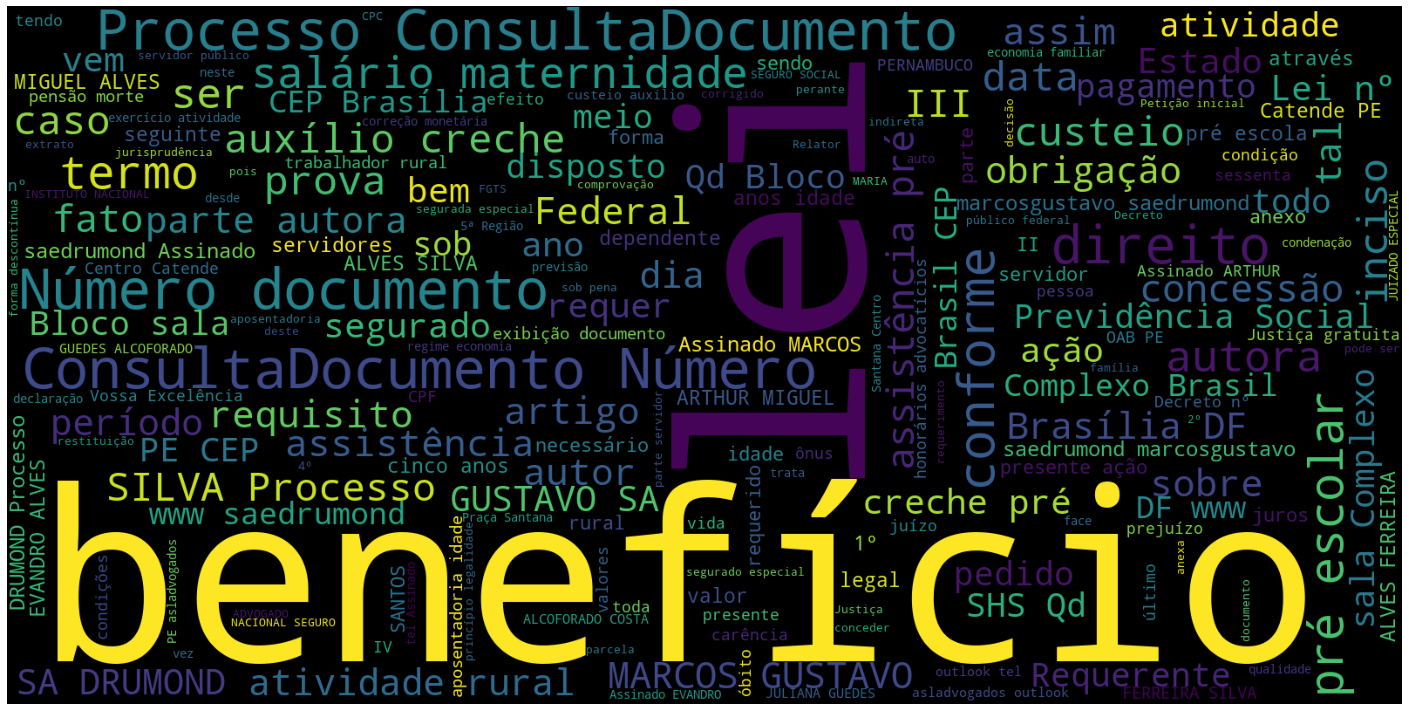

In [33]:
# mostrar imagem final
fig, ax = plt.subplots(figsize= (25, 15))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("text_wordcloud.png")